In [1]:
import os, sys
sys.path.insert(0, '../')

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
fsize = 12
params = {'legend.fontsize': fsize*0.925,          
          'axes.labelsize': fsize,
          'axes.titlesize':fsize*1.25,
          'xtick.labelsize':fsize*0.925,
          'ytick.labelsize':fsize*0.925 }
sns.set(palette='pastel', rc=params)


import numpy as np
import scipy.io as sio

import seaborn as sns

from utils import io_utils
from utils.metric_utils import MetricWrapper
from analysis import analysis_funcs as af
from analysis import stats
from analysis import exp_filepaths
import pandas as pd

/home/arjundd/anaconda3/envs/tf_36/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
# load written outputs
base_fp = exp_filepaths.ARCH_DEEPLAB
pred_files = []
for f in os.listdir(base_fp):
    if f.endswith('.pred'):
        pred_files.append(os.path.join(base_fp, f))
pred_files.sort()

In [3]:
def crop_edge_slices(y_true, y_pred):
    # sum y_true along y,x dimensions to get  
    num_pixels_per_slice = np.sum(y_true, axis=(0,1))
    inds = np.nonzero(num_pixels_per_slice)[0]
    
    # crop volume from first non-zero element to last non-zero element
    crop_inds = range(inds[0], inds[-1] + 1)
    
    return y_true[..., crop_inds], y_pred[..., crop_inds]

In [4]:
# Compute accuracy metrics with total volume and cropped data (i.e. discard edge slices)  
voxel_spacing = (0.3125, 0.3125, 1.5)
mw_full = MetricWrapper()
mw_vol_crop = MetricWrapper()

for fp in pred_files:
    data = io_utils.load_h5(fp)
    y_true = np.transpose(np.squeeze(data['gt']), axes=[1, 2, 0])
    y_pred = np.transpose(np.squeeze(data['recon'] > 0.5), axes=[1, 2, 0])
    mw_full.compute_metrics(y_true, y_pred, voxel_spacing)
    
    y_true_cropped, y_pred_cropped = crop_edge_slices(y_true, y_pred)
    mw_vol_crop.compute_metrics(y_true_cropped, y_pred_cropped, voxel_spacing)

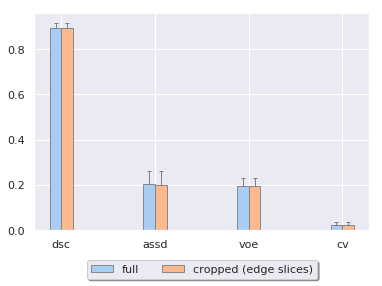

,full,cropped (edge slices)
dsc,$0.8922\pm0.023$,$0.8924\pm0.023$
assd,$0.202\pm0.058$,$0.2011\pm0.058$
voe,$0.1939\pm0.038$,$0.1935\pm0.038$
cv,$0.0203\pm0.015$,$0.0205\pm0.015$


In [5]:
import pandas as pd
metrics = ['dsc', 'assd', 'voe', 'cv']
ordered_keys = ['full', 'cropped (edge slices)']
data_dict = {'full': mw_full, 'cropped (edge slices)': mw_vol_crop}
t_mean = []
t_error = []
for m in metrics:
        m_mean = []
        m_error = []
        for k in ordered_keys:
            data = data_dict[k].metrics[m]

            m_mean.append(np.mean(data))
            m_error.append(np.std(data))

        t_mean.append(m_mean)
        t_error.append(m_error)

exp_means = pd.DataFrame(t_mean, index=metrics, columns=ordered_keys)
exp_stds = pd.DataFrame(t_error, index=metrics, columns=ordered_keys)

af.display_bar_graph(exp_means, exp_stds)

df1 = exp_means.round(4).astype(str)
df2 = exp_stds.round(3).astype(str)

display('$'+df1 + '\pm' + df2 +'$')
    

In [6]:
A = pd.DataFrame.from_dict(mw_full.metrics)
B = pd.DataFrame.from_dict(mw_vol_crop.metrics)
display(B-A)

,dsc,voe,cv,assd,precision,recall
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
8,0.000222,-0.000380,0.000244,-0.000859,0.000452,0.0
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
